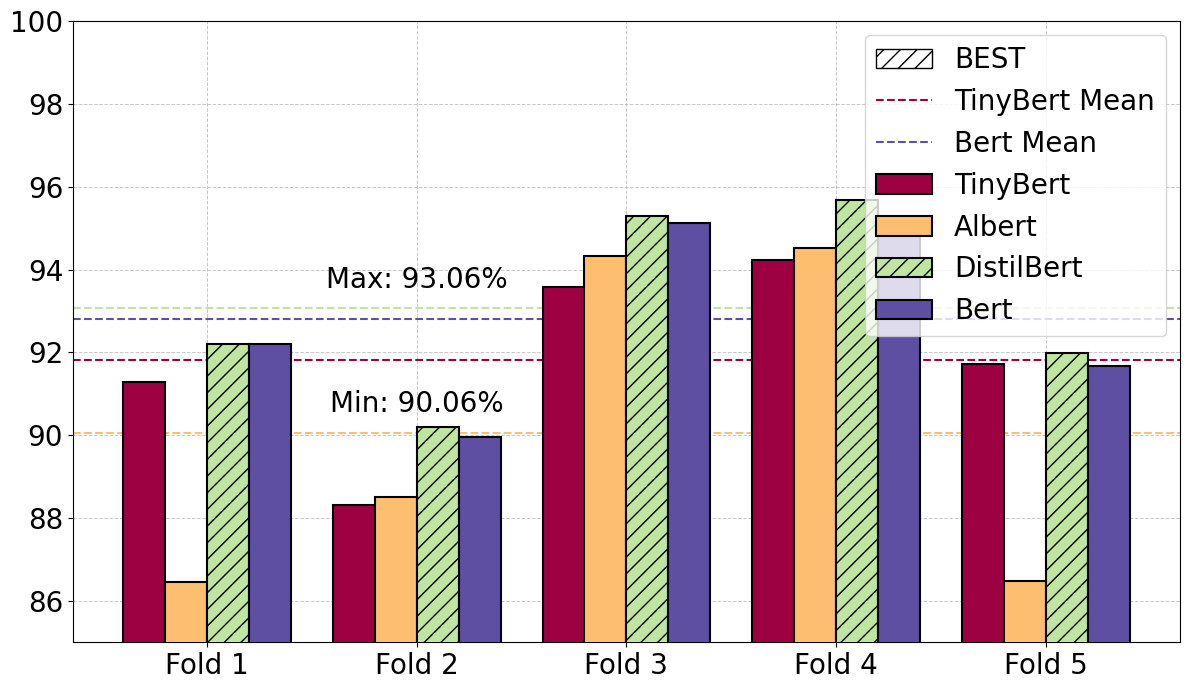

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
TinyBert = [91.29, 88.32, 93.57, 94.24, 91.71]
Albert = [86.46, 88.5, 94.33, 94.53, 86.49]
DistilBert = [92.19, 90.19, 95.28, 95.67, 91.98]
Bert = [92.19, 89.95, 95.13, 95.1, 91.66]

data = np.array([TinyBert, Albert, DistilBert, Bert])
max_indices = np.argmax(data, axis=0)

x = np.arange(len(folds))
width = 0.2
colors = plt.cm.Spectral(np.linspace(0, 1, 4))

fig, ax = plt.subplots(figsize=(12,7))

labels = ['TinyBert', 'Albert', 'DistilBert', 'Bert']
rects = []
for i in range(4):
    rect = ax.bar(x + (i - 1.5)*width, data[i], width, label=labels[i], color=colors[i], edgecolor='black', linewidth=1.5, zorder=3)
    rects.append(rect)

for fold in range(len(folds)):
    max_idx = max_indices[fold]
    rects[max_idx].patches[fold].set_hatch('//')

TinyBert_mean = np.mean(TinyBert)
Albert_mean = np.mean(Albert)
DistilBert_mean = np.mean(DistilBert)
Bert_mean = np.mean(Bert)

ax.axhline(y=TinyBert_mean, color=colors[0], linestyle='--', label='TinyBert Mean', zorder=2)
ax.axhline(y=Albert_mean, color=colors[1], linestyle='--', zorder=2)
ax.axhline(y=DistilBert_mean, color=colors[2], linestyle='--', zorder=2)
ax.axhline(y=Bert_mean, color=colors[3], linestyle='--', label='Bert Mean', zorder=2)

max_mean = max(TinyBert_mean, Albert_mean, DistilBert_mean, Bert_mean)
min_mean = min(TinyBert_mean, Albert_mean, DistilBert_mean, Bert_mean)

ax.text(x[1], max_mean + 0.5, f'Max: {max_mean:.2f}%', ha='center', fontsize=20, color='black', zorder=3)
ax.text(x[1], min_mean + 0.5, f'Min: {min_mean:.2f}%', ha='center', fontsize=20, color='black', zorder=3)

ax.set_ylim([85, 100])
ax.set_xticks(x)
ax.set_xticklabels(folds, fontsize=20)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7, zorder=1)
ax.tick_params(axis='both', which='major', labelsize=20)

hatch_patch = mpatches.Patch(facecolor='white', edgecolor='black', hatch='//', label='BEST')
legend_handles, legend_labels = ax.get_legend_handles_labels()
legend = ax.legend(handles=[hatch_patch] + legend_handles, fontsize=20, loc='upper right')

plt.tight_layout()
plt.show()
